Initial number of conflicts: 4
Final number of conflicts: 0


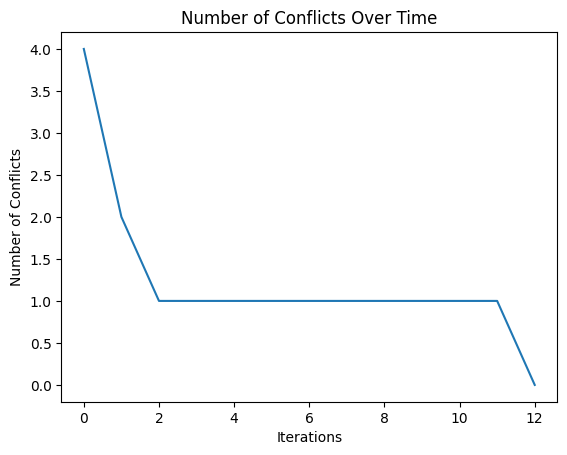

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def random_graph(n, p):
    """
    Generates a random graph with n nodes and edge probability p.
    """
    return nx.erdos_renyi_graph(n, p)

def random_coloring(graph, num_colors):
    """
    Assigns random colors to each node in the graph.
    """
    colors = {}
    for node in graph.nodes():
        colors[node] = random.randint(0, num_colors - 1)
    return colors

def conflicts(graph, colors):
    """
    Counts the number of conflicts in the graph coloring.
    A conflict occurs if adjacent nodes have the same color.
    """
    num_conflicts = 0
    for u, v in graph.edges():
        if colors[u] == colors[v]:
            num_conflicts += 1
    return num_conflicts

def plot_conflicts_over_time(conflicts_list):
    """
    Plots the number of conflicts over time.
    """
    plt.plot(conflicts_list)
    plt.xlabel('Iterations')
    plt.ylabel('Number of Conflicts')
    plt.title('Number of Conflicts Over Time')
    plt.show()

def main():
    num_nodes = 10
    edge_probability = 0.3
    num_colors = 3
    max_iterations = 1000

    graph = random_graph(num_nodes, edge_probability)
    colors = random_coloring(graph, num_colors)
    initial_conflicts = conflicts(graph, colors)
    print("Initial number of conflicts:", initial_conflicts)

    conflicts_list = [initial_conflicts]
    for _ in range(max_iterations):
        #search algorithm to reduce conflicts
        node = random.choice(list(graph.nodes()))
        current_color = colors[node]
        neighbors = list(graph.neighbors(node))
        neighbor_colors = [colors[neighbor] for neighbor in neighbors]

        new_color = (current_color + 1) % num_colors
        while new_color in neighbor_colors:
            new_color = (new_color + 1) % num_colors

        colors[node] = new_color
        current_conflicts = conflicts(graph, colors)
        conflicts_list.append(current_conflicts)

        if current_conflicts == 0:
            break

    final_conflicts = conflicts_list[-1]
    print("Final number of conflicts:", final_conflicts)

    plot_conflicts_over_time(conflicts_list)

if __name__ == "__main__":
    main()

